<h1 align="center"> Proyecto Simulación Estocástica:


Aplicación del Método de Descenso del Gradiente Estocástico y ADAM para entrenar una Red Neuronal para predecir resultados en la PAES específica de matemáticas.


<h2 align="center">  Integrantes: Sebastián Sabat y Rocío Yáñez
<h3 align="center"> MA4402 - Simulación Estocástica.
<h3 align="center"> Primavera 2023

---

**OBJETIVO DE LA INVESTIGACIÓN:**

Desarrollar un predictor vía Deep Learning que permita conocer el rendimiento en la prueba específica de matemáticas a partir de una colección de datos de entrada y minimizar la función de pérdida bajo un método estocástico (SGD) y un método determinista (ADAM).

**METODOLOGÍA**

El proceso se dividió en tres grandes bloques:

1. Análisis exploratorio y filtrado de los datos.
2. Búsqueda de atributos predictores.
3. Desarrollo de la Red Neuronal y minimización de la función de pérdida para ambos métodos.


## PRELIMINARES

In [1]:
!pip install pyreadstat

In [2]:
import csv as c
import numpy as np
import pandas as pd
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
#from google.colab import files
import pyreadstat
import io

In [3]:
#CARGAR LA BASE DE DATOS, PARA EJECUTAR ESTE DRIVE, LA BASE DEBE ESTAR EN EL DRIVE DE LA PERSONA,
# LUEGO A CONTINUACIÓN DE 'path' SE DEBE COLOCAR LA RUTA DEL ARCHIVO EN DRIVE.

#from google.colab import drive     #PERMITE CONECTAR CON DRIVE, SI ES QUE LA BASE DE DATOS SE ENCUENTRA DENTRO DE ÉL.
#drive.mount('/content/drive')


#Nombre = input("Coloca R de Rocío o S de Seba: ")

#if Nombre == "S":
#  path  = '/content/drive/MyDrive/ProyectoSimulacion/A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv'  #Path para Sebastián Sabat
#else:
#  path =  "Chío, debes colocar aquí tu path"

#cambiar por ruta al archivo csv o usar lo de arriba si usa google colab
path= "C:/Users/yo/Downloads/A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv" 
Puntajes  = pd.read_csv(path, delimiter =';')

C:\Users\yo\AppData\Local\Temp\ipykernel_10064\211945910.py:15: DtypeWarning: Columns (17,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  Puntajes  = pd.read_csv("C:/Users/yo/Downloads/A_INSCRITOS_PUNTAJES_2023_PAES_PUB_MRUN.csv", delimiter =';')


# ANÁLISIS EXPLORATORIO Y FILTRADO DE LA BASE DE DATOS

El principal objetivo es limpiar la base de datos que podrían desviarse sistemáticamente de los valores esperados y también, descubrir el tipo de variable de cada atributo.

In [4]:
#Cambiaremos el nombre de la base de datos:
df=Puntajes

#Borramos los datos repetidos de esta base de datos.
df.drop_duplicates(inplace=True, ignore_index=True)

#Vemos que la data tiene 296.812 filas y 117 columnas, hay 73 atributos enteros y 44 de tipo 'object'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296812 entries, 0 to 296811
Columns: 117 entries, MRUN to OMITIDAS_INV_CTP
dtypes: int64(73), object(44)
memory usage: 264.9+ MB


## Filtro por fecha de nacimiento:

In [5]:
#A CONTINUACIÓN MOSTRAREMOS QUE EXISTEN FECHAS DE NACIMIENTO QUE PODRÍAN SER PATOLÓGICAS.

año='19' #Veremos todas las fechas de nacimiento que tienen un 19 en el año.

#Pasamos los datos a string.
df['FECHA_NACIMIENTO'] = df ['FECHA_NACIMIENTO'].astype (str)

Base_fechas=df[df['FECHA_NACIMIENTO'].str.contains(año)]
print(len(Base_fechas))  #Veremos que hay 22.625 personas que nacieron en el siglo XX. En particular, varios nacieron en la década de los 40.
Base_fechas.head()

22625


,MRUN,ANYO_PROCESO,COD_SEXO,FECHA_NACIMIENTO,RBD,CODIGO_ENS,LOCAL_EDUCACIONAL,UNIDAD_EDUCATIVA,NOMBRE_UNIDAD_EDUC,RAMA_EDUCACIONAL,...,PRUEBA_INV_CQUI,FORMA_INV_CQUI,CORRECTAS_INV_CQUI,ERRADAS_INV_CQUI,OMITIDAS_INV_CQUI,PRUEBA_INV_CTP,FORMA_INV_CTP,CORRECTAS_INV_CTP,ERRADAS_INV_CTP,OMITIDAS_INV_CTP
0,3703667,2023,1,194708,5654,310,1747,1,INSTITUTO CLARET,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
1,8437289,2023,1,194503,40407,363,3997,1,CENTRO DE ESTUDIOS BORDEMAR,H2,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
2,17372901,2023,1,194612,3645,363,1514,1,LICEO VIDA NUEVA,H2,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
4,22654139,2023,2,194507,3003,363,1450,2,COLEGIO PIAGET,H2,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
5,2824489,2023,2,195010,11811,363,3527,1,LICEO SANTA MARIA EUFRASIA,H2,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0


In [6]:
#FILTRAREMOS LA BASE DE DATOS POR FECHA, SÓLO CONSIDERAREMOS NACIDOS EL 2004.

año1='2004'  #Esta es la fecha de nacimiento de los estudiantes que tenían 18 años a fecha del 2022.

#Pasamos los datos a string.
df['FECHA_NACIMIENTO'] = df ['FECHA_NACIMIENTO'].astype (str)

#Filtramos por año de nacimiento:
df=df[df['FECHA_NACIMIENTO'].str.contains(año1)]
len(df)

125942

## Filtro por fecha de egreso:

In [7]:
#A CONTINUACIÓN MOSTRAREMOS QUE EXISTEN FECHAS DE EGRESO QUE PODRÍAN SER PATOLÓGICAS.

not_in_2022=df['ANYO_DE_EGRESO'] != '2022'
base_egresos= df[not_in_2022]

print(len(base_egresos)) #Vemos que hay 31.800 estudiantes que egresaron antes del 2022 y que nacieron el 2004.
base_egresos.head()

31800


,MRUN,ANYO_PROCESO,COD_SEXO,FECHA_NACIMIENTO,RBD,CODIGO_ENS,LOCAL_EDUCACIONAL,UNIDAD_EDUCATIVA,NOMBRE_UNIDAD_EDUC,RAMA_EDUCACIONAL,...,PRUEBA_INV_CQUI,FORMA_INV_CQUI,CORRECTAS_INV_CQUI,ERRADAS_INV_CQUI,OMITIDAS_INV_CQUI,PRUEBA_INV_CTP,FORMA_INV_CTP,CORRECTAS_INV_CTP,ERRADAS_INV_CTP,OMITIDAS_INV_CTP
338,15004462,2023,2,200403,218,310,61,1,LICEO FRANCISCO DE AGUIRRE,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
379,14464361,2023,2,200405,253,310,2307,1,COLEGIO ADVENTISTA DE CALAMA,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
2400,12494969,2023,1,200406,10641,310,3065,1,LICEO ALTO JAHUEL,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
2643,18983714,2023,1,200402,9058,410,1025,2,INSTITUTO SUPERIOR DE COMERCIO DIEGO PORT,T1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
2657,5430379,2023,2,200406,191,310,29,1,LIC. ALCDE.SERGIO GONZALEZ GUTIERREZ,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0


In [8]:
#Filtramos por año de egreso:
in_2022 = df['ANYO_DE_EGRESO'] == '2022'
df = df[in_2022]

## Filtramos por rendición actual:

In [9]:
#AHORA VEAMOS SI ALGUNOS ESTUDIANTES QUE NACIERON EL 2004 Y EGRESARON EL 2022, LLEGARON A DAR LA PRUEBA ANTES.
not_tipo_1 = df['RINDIO_PROCESO_ACTUAL'] != 1
len(df[not_tipo_1]) #Vemos que hay 8 personas que pueden cumplir una de tres opciones: no rindió pruebas en el proceso actual,
                    # dio sólo prueba de invierno o dio prueba de invierno y la de fin de año.

8

In [10]:
#Filtramos por tipo de rendición actual:
tipo_1 = df['RINDIO_PROCESO_ACTUAL'] == 1
df = df[tipo_1]

## Filtramos por plan de estudios:

In [11]:
#Re-indexamos:
df.reset_index(inplace=True)
df.drop(['index'], axis = 'columns', inplace = True)

In [12]:
Programas_convencionales = ["310", "410", "510", "610", "710", "810", "910"]

idx=[]

for i in range(0,len(df)):
  CODIGO_ENS = df['CODIGO_ENS'][i]                      #Filtramos el tipo de programa educativo, para que sólo hayan planes H-C,
                                                        # técnicos industriales, agrónomos, comerciales y artísticos para jóvenes
                                                        # y/o niños. No planes "para adultos".
  if (CODIGO_ENS  in Programas_convencionales):         #Con esto quedarán descartados estudiantes que fueron a colegios en cárceles,
    idx +=[i]                                           # planes 2x1, etc.


df = df.filter(idx, axis = 'index')

In [13]:
#Re-indexamos:
df.reset_index(inplace=True)
df.drop(['index'], axis = 'columns', inplace = True)

In [14]:
#Vemos que no hay nulls.
nulls=df.isnull().sum()
nulls[nulls!=0]

Series([], dtype: int64)

In [15]:
#Vemos que no hay na.
datos_nulos=df.isnull().sum()
datos_nulos[datos_nulos!=0]

Series([], dtype: int64)

## Filtremos a los estudiantes que rindieron mal las pruebas:

Para esto, diremos que un estudiante rindió **bien** las pruebas si rindió las obligatorias necesarias para poder postular a una carrera, es decir, rindió comprensión lectora, matemáticas general, rindió una entre ciencias e historia y, por su puesto, rindió la específica de matemáticas (que es nuestra variable objetivo).

Diremos que un estudiante rindió mal las pruebas si no las rindió bien.

In [16]:
#La idea es filtrar los casos de estudiantes que no riendieron bien las pruebas, esto lo podemos saber viendo si es que
# no riendieron alguna prueba que era obligatoria.

def p(x):
  a=100
  b=1000
  if x<a or x>b:
    return False
  else:
      return True

idx=[]
for i in range(0,len(df)):
  MA1  = float(df['MATE1_REG_ACTUAL'][i])
  MA2  = float(df['MATE2_REG_ACTUAL'][i])
  Len  = float(df['CLEC_REG_ACTUAL'][i])
  His  = float(df['HCSOC_REG_ACTUAL'][i])
  Cie  = float(df['CIEN_REG_ACTUAL'][i])
  if p(MA1) and p(MA2) and p(Len) and ( p(His) or p(Cie) ):
    idx +=[i]

df = df.filter(idx, axis = 'index')

In [17]:
#Re-indexamos:
df.reset_index(inplace=True)
df.drop(['index'], axis = 'columns', inplace = True)

df.head()

,MRUN,ANYO_PROCESO,COD_SEXO,FECHA_NACIMIENTO,RBD,CODIGO_ENS,LOCAL_EDUCACIONAL,UNIDAD_EDUCATIVA,NOMBRE_UNIDAD_EDUC,RAMA_EDUCACIONAL,...,PRUEBA_INV_CQUI,FORMA_INV_CQUI,CORRECTAS_INV_CQUI,ERRADAS_INV_CQUI,OMITIDAS_INV_CQUI,PRUEBA_INV_CTP,FORMA_INV_CTP,CORRECTAS_INV_CTP,ERRADAS_INV_CTP,OMITIDAS_INV_CTP
0,21055758,2023,2,200405,25571,310,3129,1,COLEGIO EL RACO,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
1,18727126,2023,2,200411,40422,610,4285,2,COLEGIO NIRVANA,T3,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
2,18152939,2023,1,200406,12686,310,3124,6,LICEO ACADEMIA NACIONAL,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
3,23506412,2023,2,200411,129,310,41,1,LICEO SUPERIOR GABRIELA MISTRAL,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0
4,2771736,2023,1,200410,25853,310,3060,1,COLEGIO POLIVALENTE NOVO HORIZONTE,H1,...,Ciencias Química.,0,0,0,0,Ciencias Técnico Profesional.,0,0,0,0


## Conservaremos sólo los atributos que por interés propio (surgido al estudiar la documentación) nos parecen relevantes de estudiar:

In [18]:
#Borraremos las columnas que describen atributos que no nos interesará estudiar.

#Columnas de interés
columns=["FECHA_NACIMIENTO",'COD_SEXO','RAMA_EDUCACIONAL',"UNIDAD_EDUCATIVA",'PTJE_NEM','PTJE_RANKING','ANYO_DE_EGRESO','MATE2_REG_ACTUAL',\
        'CLEC_REG_ACTUAL',"MATE1_REG_ACTUAL","CIEN_REG_ACTUAL",'HCSOC_REG_ACTUAL']

df=df[columns]

In [19]:
#Re-indexamos:
df.reset_index(inplace=True)
df.drop(['index'], axis = 'columns', inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40477 entries, 0 to 40476
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FECHA_NACIMIENTO  40477 non-null  object
 1   COD_SEXO          40477 non-null  int64 
 2   RAMA_EDUCACIONAL  40477 non-null  object
 3   UNIDAD_EDUCATIVA  40477 non-null  object
 4   PTJE_NEM          40477 non-null  int64 
 5   PTJE_RANKING      40477 non-null  int64 
 6   ANYO_DE_EGRESO    40477 non-null  object
 7   MATE2_REG_ACTUAL  40477 non-null  object
 8   CLEC_REG_ACTUAL   40477 non-null  object
 9   MATE1_REG_ACTUAL  40477 non-null  object
 10  CIEN_REG_ACTUAL   40477 non-null  object
 11  HCSOC_REG_ACTUAL  40477 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.7+ MB


# SELECCIÓN DE ATRIBUTOS

In [21]:
#De la línea de código anterior, vemos que la variable objetivo 'MATE2_REF_ACTUAL' no es numérica.
df['MATE2_REG_ACTUAL'] = df ['MATE2_REG_ACTUAL']. astype ( float )
df['MATE1_REG_ACTUAL'] = df ['MATE1_REG_ACTUAL']. astype ( float )
df['CLEC_REG_ACTUAL'] = df ['CLEC_REG_ACTUAL']. astype ( float )
df['HCSOC_REG_ACTUAL'] = df ['HCSOC_REG_ACTUAL']. astype ( float )
df['CIEN_REG_ACTUAL'] = df ['CIEN_REG_ACTUAL']. astype ( float )
df['MATE2_REG_ACTUAL'].dtypes

dtype('float64')

In [22]:
#Veamos el tipo de dato para el resto de las variables.
df.dtypes

FECHA_NACIMIENTO     object
COD_SEXO              int64
RAMA_EDUCACIONAL     object
UNIDAD_EDUCATIVA     object
PTJE_NEM              int64
PTJE_RANKING          int64
ANYO_DE_EGRESO       object
MATE2_REG_ACTUAL    float64
CLEC_REG_ACTUAL     float64
MATE1_REG_ACTUAL    float64
CIEN_REG_ACTUAL     float64
HCSOC_REG_ACTUAL    float64
dtype: object

## Estudiar correlación con el género:

Referencia:
FACSO-Universidad de Chile. Prueba de Hipótesis para la Diferencia de medias, Gallardo, Antivilo y Marrot, 2011.

[Enlace material de ucursos](https://www.u-cursos.cl/facso/2011/1/PSI-E2/1/material_docente/bajar%3Fid_material%3D582249)


In [23]:
#Obs: 1 representa a hombres y 2 a mujeres.

data = df['MATE2_REG_ACTUAL'].groupby(df['COD_SEXO'])
summary=data.describe()
summary

,count,mean,std,min,25%,50%,75%,max
COD_SEXO,,,,,,,,
1,22972.0,448.492817,112.344919,100.0,385.0,413.0,483.0,1000.0
2,17505.0,432.427592,97.191208,100.0,369.0,413.0,459.0,1000.0


A continuación, realizaremos el test de hipótesis para evaluar si la el género tiene o no efecto, consideramos $\alpha = 1\%$, luego se tiene que $Z_{1-\frac{\alpha}{2}}=2.58$.

Para realizar este test, se considerará $\mu_{1}$ y $\mu_{2}$ la medias de los puntajes en la prueba de matemáticas electivas para los grupos de hombres y mujeres respectivamente.

Se define:
* **H0:** $\mu_{1}=\mu_{2}$ (que es equivalente a que no existe correlación).
* **HA:** $\mu_{1} \not= \mu_{2}$.

Luego, sabemos que:

$$ T =\frac{\mu_{1}-\mu_{2}}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{1}^{2}}{n_{2}}}} \sim N(0,1)$$

**Observación**: en realidad distribuye *t-student* con una cierta cantidad de grados de libertad (free degree) que se puede calcular vía:

$$FD=\frac{\left(\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^
2}{n_{2}}\right)^{2}}{\frac{\left(\frac{\sigma_{1}^{2}}{n_{1}}\right)^{2}}{n_{1}-1}+\frac{\left(\frac{\sigma_{2}^{2}}{n_{2}}\right)^{2}}{n_{2}-1}}$$

Se sabe que una variable aleatoria *t-student* es aproximable por una distribución normal cero-uno si $FD$ es mayor estricto que $30$.

In [24]:
media_Man = summary['mean'][1]
media_Woman = summary['mean'][2]

var_Man = summary['std'][1]**2
var_Woman = summary['std'][2]**2

n_Man = summary['count'][1]
n_Woman = summary['count'][2]

numerador =(var_Man/n_Man + var_Woman/n_Woman)**2

denominador = (var_Man/n_Man)**2/(n_Man-1) + (var_Woman/n_Woman)**2/(n_Woman-1)

FD = numerador / denominador

if FD > 30:
  print("Se puede aproximar por una distribución normal.")

Diff_medias=media_Man-media_Woman

Se puede aproximar por una distribución normal.


In [25]:
#Como sabemos que T distribuye Normal(0,1), luego:

Z=2.58

liminf=Diff_medias-Z*mt.sqrt( (var_Man/n_Man) + (var_Woman/n_Woman))
limsup=Diff_medias+Z*mt.sqrt( (var_Man/n_Man) + (var_Woman/n_Woman))

print('Intervalo de confianza: [' + str(liminf) + " , " + str(limsup)+']')


if (liminf <= 0) and (0 <= limsup) :
  print("No se puede rechazar hipótesis nula.")
else:
  print("Se rechaza hipótesis nula.")

Intervalo de confianza: [13.372801098656845 , 18.757649353971267]
Se rechaza hipótesis nula.


## Estudiar correlación con variables continuas

Se realiza un cambio en los códigos de la base de datos para cuantificar la rama educacional:
* 0=H1: Humanista Científico Diurno
* 1=H2: Humanista Científico Nocturno
* 2=H3: Humanista Científico – Validación de estudios
* 3=H4: Humanista Científico – Reconocimiento de estudios
* 4=T1: Técnico Profesional Comercial
* 5=T2: Técnico Profesional Industrial
* 6=T3: Técnico Profesional Servicios y Técnica
* 7=T4: Técnico Profesional Agrícola
* 8=T5: Técnico Profesional Marítima

In [26]:
df['RAMA_EDUCACIONAL']=df['RAMA_EDUCACIONAL'].replace(['H1', "H2", "H3", "H4", "T1", "T2", "T3", "T4", "T5"],[0,1,2,3,4,5,6,7,8])
df.head()

,FECHA_NACIMIENTO,COD_SEXO,RAMA_EDUCACIONAL,UNIDAD_EDUCATIVA,PTJE_NEM,PTJE_RANKING,ANYO_DE_EGRESO,MATE2_REG_ACTUAL,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,CIEN_REG_ACTUAL,HCSOC_REG_ACTUAL
0,200405,2,0,1,785,808,2022,428.0,663.0,579.0,0.0,565.0
1,200411,2,6,2,0,0,2022,369.0,574.0,516.0,458.0,380.0
2,200406,1,0,6,757,840,2022,413.0,536.0,413.0,0.0,380.0
3,200411,2,0,1,915,1000,2022,444.0,649.0,452.0,409.0,335.0
4,200410,1,0,1,604,604,2022,385.0,490.0,480.0,0.0,454.0


In [27]:
#VEAMOS COMO SE COMPORTA EL ATRIBUTO RAMA EDUCACIONAL:

#Con el siguiente código, se puede ver que hay 4 valores ''.
freq = df['RAMA_EDUCACIONAL'].groupby(df['RAMA_EDUCACIONAL']).count()
print(freq)

# Eliminamos las filas con valores '' en 'RAMA_EDUCACIONAL':
df = df[df['RAMA_EDUCACIONAL'] != '']

# Verificamos si hay valores nulos
print("Valores nulos después de eliminar cadenas vacías:")
print(df['RAMA_EDUCACIONAL'].isnull().sum())

# Convertimos la columna 'RAMA_EDUCACIONAL' a float, manejo de valores nulos
df['RAMA_EDUCACIONAL'] = pd.to_numeric(df['RAMA_EDUCACIONAL'], errors='coerce')

# Verificamos si hay valores nulos después de la conversión
print("Valores nulos después de la conversión a float:")
print(df['RAMA_EDUCACIONAL'].isnull().sum())

RAMA_EDUCACIONAL
0    30112
4     3439
5     4433
6     2047
7      370
8       76
Name: RAMA_EDUCACIONAL, dtype: int64
Valores nulos después de eliminar cadenas vacías:
0
Valores nulos después de la conversión a float:
0


In [28]:
#Pasemos sus datos a valores reales.
df['RAMA_EDUCACIONAL'] = df ['RAMA_EDUCACIONAL']. astype ( float )
df.head()

,FECHA_NACIMIENTO,COD_SEXO,RAMA_EDUCACIONAL,UNIDAD_EDUCATIVA,PTJE_NEM,PTJE_RANKING,ANYO_DE_EGRESO,MATE2_REG_ACTUAL,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,CIEN_REG_ACTUAL,HCSOC_REG_ACTUAL
0,200405,2,0.0,1,785,808,2022,428.0,663.0,579.0,0.0,565.0
1,200411,2,6.0,2,0,0,2022,369.0,574.0,516.0,458.0,380.0
2,200406,1,0.0,6,757,840,2022,413.0,536.0,413.0,0.0,380.0
3,200411,2,0.0,1,915,1000,2022,444.0,649.0,452.0,409.0,335.0
4,200410,1,0.0,1,604,604,2022,385.0,490.0,480.0,0.0,454.0


**Observación:** para estudiar correctamente si Rama Educacional debiese incluirse o no, lo correcto sería construir $n$ variables binarias, una por cada tipo de resultado que puede tomar la variable Rama Educacional, que en este caso son 6 (0, 4,5,6,7 y 8) y luego realizar test de hipótesis para las diferencias de medias entre la variable objetivo y cada una de estas variables binarias.

Sin embargo, dado que hacer tantas veces ese proceso podría resultad tedioso, en realidad para disminuir la cantidad de trabajo aprovecharemos que fueron convertidas a valor real para ver la correlación vía el coeficiente de correlación de Pearson. Esta es sólo una simplificación para disminuir la cantidad de trabajo.

In [29]:
df.head()

,FECHA_NACIMIENTO,COD_SEXO,RAMA_EDUCACIONAL,UNIDAD_EDUCATIVA,PTJE_NEM,PTJE_RANKING,ANYO_DE_EGRESO,MATE2_REG_ACTUAL,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,CIEN_REG_ACTUAL,HCSOC_REG_ACTUAL
0,200405,2,0.0,1,785,808,2022,428.0,663.0,579.0,0.0,565.0
1,200411,2,6.0,2,0,0,2022,369.0,574.0,516.0,458.0,380.0
2,200406,1,0.0,6,757,840,2022,413.0,536.0,413.0,0.0,380.0
3,200411,2,0.0,1,915,1000,2022,444.0,649.0,452.0,409.0,335.0
4,200410,1,0.0,1,604,604,2022,385.0,490.0,480.0,0.0,454.0


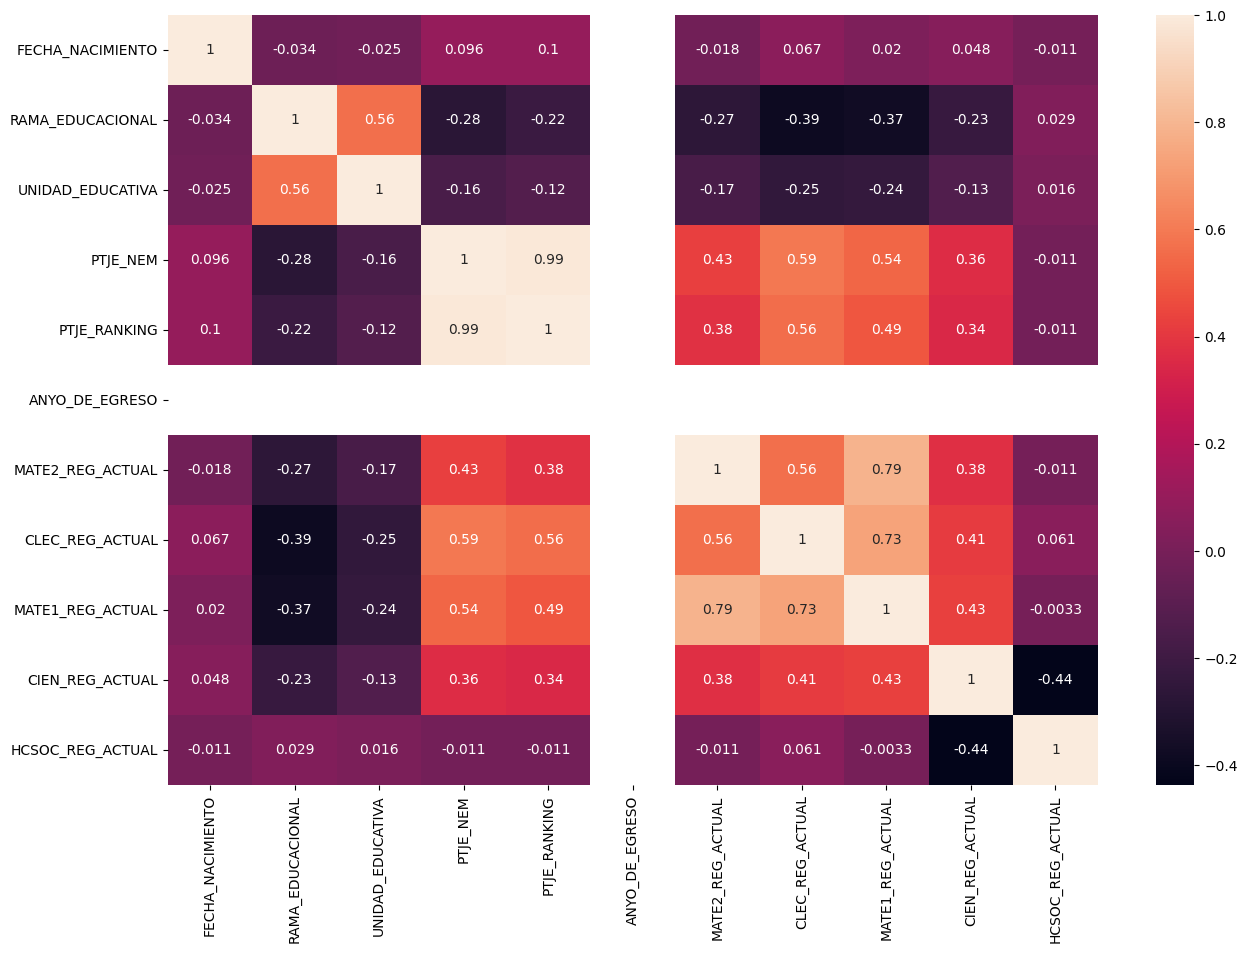

In [30]:
df_correlacion=df.drop('COD_SEXO', axis= 'columns', inplace = False)  #Para el gráfico de correlación, sacaremos el sexo pues ya estudiamos
                                                                  # sí era significativo o no
                                                                  # vía el test de diferencia de medias.

corr_df = df_correlacion.corr(method="pearson")
plt.figure(figsize=(15, 10))
sns.heatmap(corr_df, annot=True)
plt.show()

Recordamos que en esta matriz solo nos interesan las varibles continuas, en específico, nos fijamos en el Ranking y en el NEM de los estudiantes. Las cuales presentan correlación alta con la prueba de matemáticas específica, que es la variable que nos interesa.

# ENTRENAMIENTO RED NEURONAL

In [31]:
df.head()

,FECHA_NACIMIENTO,COD_SEXO,RAMA_EDUCACIONAL,UNIDAD_EDUCATIVA,PTJE_NEM,PTJE_RANKING,ANYO_DE_EGRESO,MATE2_REG_ACTUAL,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,CIEN_REG_ACTUAL,HCSOC_REG_ACTUAL
0,200405,2,0.0,1,785,808,2022,428.0,663.0,579.0,0.0,565.0
1,200411,2,6.0,2,0,0,2022,369.0,574.0,516.0,458.0,380.0
2,200406,1,0.0,6,757,840,2022,413.0,536.0,413.0,0.0,380.0
3,200411,2,0.0,1,915,1000,2022,444.0,649.0,452.0,409.0,335.0
4,200410,1,0.0,1,604,604,2022,385.0,490.0,480.0,0.0,454.0


In [32]:
#Empezamos a entrenar la máquina
columns2=['COD_SEXO','PTJE_NEM','PTJE_RANKING','MATE2_REG_ACTUAL','RAMA_EDUCACIONAL'] #Predictores
dataset1=df[columns2]

In [33]:
#Hacemos una clase que indique si a un estudiante si le fue bien o mal
size=dataset1['PTJE_NEM'].size
print(size)

dataset1['class']=np.zeros(size)

dataset1.loc[dataset1.MATE2_REG_ACTUAL > 500, "class"] = 1 #Generamos la clase

dataset1= dataset1.drop(['MATE2_REG_ACTUAL'], axis=1)

40477


C:\Users\yo\AppData\Local\Temp\ipykernel_10064\2845504778.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1['class']=np.zeros(size)


In [34]:
#Procedemos a normalizar los datos
#'COD_SEXO' tiene valores 1 o 2, reemplazamos el 2 por 0
dataset1['COD_SEXO']=dataset1['COD_SEXO'].replace(2,0)
dataset1.head()

,COD_SEXO,PTJE_NEM,PTJE_RANKING,RAMA_EDUCACIONAL,class
0,0,785,808,0.0,0.0
1,0,0,0,6.0,0.0
2,1,757,840,0.0,0.0
3,0,915,1000,0.0,0.0
4,1,604,604,0.0,0.0


In [35]:
#Normalizamos los datos
#'PTJE_NEM'
max_nem = dataset1["PTJE_NEM"].max()
dataset1['PTJE_NEM'] = dataset1["PTJE_NEM"] / max_nem

#'PTJE_RANKING'
max_ranking = dataset1["PTJE_RANKING"].max()
dataset1['PTJE_RANKING'] = dataset1["PTJE_RANKING"] / max_ranking

#'RAMA_EDUCACIONAL'
max_ranking = dataset1['RAMA_EDUCACIONAL'].max()
dataset1['RAMA_EDUCACIONAL'] = dataset1['RAMA_EDUCACIONAL'] / max_ranking


dataset1.head()

,COD_SEXO,PTJE_NEM,PTJE_RANKING,RAMA_EDUCACIONAL,class
0,0,0.785,0.808,0.00,0.0
1,0,0.000,0.000,0.75,0.0
2,1,0.757,0.840,0.00,0.0
3,0,0.915,1.000,0.00,0.0
4,1,0.604,0.604,0.00,0.0


Tenemos que nuestras clases están desbalanceadas, por lo que haremos un submuestreo aleatorio para remediarlo.

In [36]:
#Contador de Frecuencia de clases
freq2 = dataset1['class'].groupby(dataset1['class']).count()
print(freq2)

class
0.0    33031
1.0     7446
Name: class, dtype: int64


In [37]:
#Queremos balancear la base de datos
from sklearn.utils import resample
# '0' y '1' representan las dos clases

# Dividir el conjunto de datos en clases
clase_mayoritaria = dataset1[dataset1['class'] == 0]
clase_minoritaria = dataset1[dataset1['class'] == 1]

# Submuestreo de la clase mayoritaria
clase_mayoritaria_submuestreada = resample(clase_mayoritaria, replace=False, n_samples=len(clase_minoritaria), random_state=42)

# Combinar las clases submuestreada y minoritaria
dataset = pd.concat([clase_mayoritaria_submuestreada, clase_minoritaria])

dataset1.head()

,COD_SEXO,PTJE_NEM,PTJE_RANKING,RAMA_EDUCACIONAL,class
0,0,0.785,0.808,0.00,0.0
1,0,0.000,0.000,0.75,0.0
2,1,0.757,0.840,0.00,0.0
3,0,0.915,1.000,0.00,0.0
4,1,0.604,0.604,0.00,0.0


In [38]:
#Comprobamos que funcionó
freq3 = dataset['class'].groupby(dataset['class']).count()
print(freq3)

class
0.0    7446
1.0    7446
Name: class, dtype: int64


In [39]:
#80% de datos para train y 20% de datos para test
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop('class')
test_labels = test_dataset.pop('class')

In [40]:
#Convertimos todo a arrays Numpy
X_train = train_dataset.to_numpy()
X_test = test_dataset.to_numpy()

Y_train = train_labels.to_numpy()
Y_test = test_labels.to_numpy()

Y_train = Y_train[:,None]
Y_test = Y_test[:,None]

In [41]:
#This class describes a fully connected layer (without activation function)

class Linear:
    # W: weight matrix (in x out)
    # b: bias (out x 1)

    #Constructor - we define the parameters of this layer
    def __init__(self, num_inputs, num_outputs, learning_rate, name):
      #The parameters are initialized randomly - uniform distribution [0,1)
      # Inicialización de Xavier / Glorot para los pesos
      self.W = np.random.rand(num_inputs, num_outputs) * np.sqrt(2.0 / (num_inputs + num_outputs))
      self.b = np.zeros((num_outputs, 1))
      self.lr = learning_rate
      self.name = name

    # input: mini-batch (batch_size x in)
    # This function only operates the linear function
    def forward(self, input):
      self.inputs = input
      return np.dot(self.inputs, self.W) + self.b.T

    # dy: Error in next layer (batch_size x out)
    # This functions receives the error of the next layer and computes the error in this layer
    def backward(self, dy):
      batch_size = dy.shape[0]
      dy = dy.T # (out x batch_size)
      dw = dy.dot(self.inputs) #(out x in)
      db = np.sum(dy, axis=1, keepdims=True) #(out x 1)
      dx = np.dot(dy.T, self.W.T) # (batch_size x out) x (out x in)

      #SGD Rules
      self.W -= (self.lr/batch_size)*dw.T
      self.b -= (self.lr/batch_size)*db

      #The function computes the error in this layer and returns it for backpropagation
      return dx



#Class for the sigmoid activation function
class Sigmoid:
    def __init__(self):
      pass

    #Computes the sigmoid function
    def forward(self, inputs):
      self.output = 1/(1 + np.exp(-inputs))
      return self.output

    #Backpropagates the incoming error using the derivative of sigmoid
    def backward(self, dy):
      return dy*self.output*(1-self.output) # dy/4

#Class for the ReLU activation function
class ReLU:
  def __init__(self):
    pass

  def forward(self, input):
    self.input = input
    ret = input.copy()
    ret[ret<0] = 0
    return ret

  def backward(self, dy):
    dx = dy.copy()
    dx[self.input<0] = 0
    return dx

Primero implementaremos la Red Neuronal optimizada con el método de descenso del gradiente estocástico

In [42]:
lre=0.01

#Class for the neural network
class NetworkReLU:
    def __init__(self):
      lr = lre #Learning rate


      #The layers are in a list
      # Tenemos una red neuronal de 4 etapas
      self.layers = []
      self.layers.append(Linear(num_inputs=4, num_outputs=7, learning_rate=lr, name='fc1'))
      self.layers.append(ReLU())
      self.layers.append(Linear(num_inputs=7, num_outputs=3, learning_rate=lr, name='fc2'))
      self.layers.append(ReLU())
      self.layers.append(Linear(num_inputs=3, num_outputs=2, learning_rate=lr, name='fc3'))
      self.layers.append(ReLU())
      self.layers.append(Linear(num_inputs=2, num_outputs=1, learning_rate=lr, name='fc3'))
      self.layers.append(Sigmoid())
      self.num_layers = len(self.layers)

    #Implements the training algorithm with mini-batch SGD
    def train(self, training_data, training_label, batch_size, epoch, test_data, test_label, lambd=0.0025,verbose=False):
      def binary_cross_entropy_with_l2(output, labels, lambd):
        epsilon = 1e-15
        output = np.clip(output, epsilon, 1 - epsilon)
        loss = - (labels * np.log(output) + (1 - labels) * np.log(1 - output))

       # Agrega el término de regularización L2
        l2_reg = 0.0
        for layer in self.layers:
          if isinstance(layer, Linear):
            l2_reg += np.sum(layer.W ** 2)
            loss += 0.5 * lambd * l2_reg
        return loss

      #History values of losses
      train_loss = []
      test_loss = []

      #Main outer loop
      for e in range(epoch):
        # Perform a training epoch
        loss = 0

        #Iterate over each batch
        for batch_index in range(0, training_data.shape[0], batch_size):
          #We need to identify whether a batch is complete or a batch is incomplete because it is the last one
          if batch_index+batch_size < training_data.shape[0]:
            data = training_data[batch_index:batch_index+batch_size]
            label = training_label[batch_index:batch_index+batch_size]
          else:
            data = training_data[batch_index:training_data.shape[0]]
            label = training_label[batch_index:training_label.shape[0]]

          acc = 0

          #Forward pass - iterate over the list of layers
          x = data
          for l in range(self.num_layers):
            output = self.layers[l].forward(x)
            x = output

          #The first error is the derivative of the loss wrt. the NN output
          dy = output - label
          #loss += mse(output, label) #Compute the loss
          loss += np.sum(binary_cross_entropy_with_l2(output, label,lambd)) #Compute the loss

          #Backpropagate
          for l in range(self.num_layers-1, -1, -1):
            dout = self.layers[l].backward(dy)
            dy = dout

            for layer in self.layers:
              if isinstance(layer, Linear):
                loss += 0.5 * lambd * np.sum(layer.W ** 2)  # Término de regularización L2 en la pérdida
                # Resto del código de entrenamiento de la capa lineal

        #End of an epoch
        loss /= training_data.shape[0]
        train_loss.append(loss)

        #Test after one epoch
        loss = 0
        outputs = []

        correct = 0
        for batch_index in range(0, test_data.shape[0], batch_size):
          if batch_index+batch_size < test_data.shape[0]:
            data = test_data[batch_index:batch_index+batch_size]
            label = test_label[batch_index:batch_index+batch_size]
          else:
            data = test_data[batch_index:test_data.shape[0]]
            label = test_label[batch_index:test_label.shape[0]]

          acc = 0

          #Forward pass
          x = data
          for l in range(self.num_layers):
            output = self.layers[l].forward(x)
            x = output

          #loss += mse(output, label)
          loss += np.sum(binary_cross_entropy_with_l2(output, label,lambd)) #Compute the loss

          test_output = (output >= 0.5)
          #Compare the output of the network with the correct labels
          correct += (test_output == label).sum()

        loss /= test_data.shape[0]
        test_loss.append(loss)

        if verbose:
          print('Epoch {}/{}: loss = {}: Test accuracy={}'.format(e, epoch, loss, (100*correct)/test_label.shape[0]))
        else:
          if e % 20 == 0:
            print('Epoch {}/{}: loss = {}: Test accuracy={}'.format(e, epoch, loss, (100*correct)/test_label.shape[0]))

      return dict({'train_loss': train_loss, 'test_loss':test_loss})

    def evaluate(self, data, label, batch_size):
      correct = 0
      for batch_index in range(0, data.shape[0], batch_size):
        if batch_index+batch_size < data.shape[0]:
          ndata = data[batch_index:batch_index+batch_size]
          nlabel = label[batch_index:batch_index+batch_size]
        else:
          ndata = data[batch_index:data.shape[0]]
          nlabel = label[batch_index:label.shape[0]]

        x = ndata
        for l in range(self.num_layers):
          output = self.layers[l].forward(x)
          x = output

        test_output = (output >= 0.5)
        #Compare the output of the network with the correct labels
        correct += (test_output == nlabel).sum()

      return (100*correct)/label.shape[0]

    def predict(self, data, batch_size):
      output_pred = []

      for batch_index in range(0, data.shape[0], batch_size):
        if batch_index+batch_size < data.shape[0]:
          ndata = data[batch_index:batch_index+batch_size]
        else:
          ndata = data[batch_index:data.shape[0]]

        x = ndata
        for l in range(self.num_layers):
          output = self.layers[l].forward(x)
          x = output

        test_output = (output >= 0.5)
        #test_output = np.argmax(output, axis=1)
        output_pred.append(test_output)

      return np.vstack(output_pred)

In [43]:
batch_size=30
net = NetworkReLU()
history = net.train(X_train, Y_train, batch_size, 500, X_test, Y_test)

print('Train accuracy:{} - Test accuracy: {}'.format(net.evaluate(X_train, Y_train, batch_size), net.evaluate(X_test, Y_test, batch_size)))

Epoch 0/500: loss = 0.7109854174280812: Test accuracy=49.05977165883143
Epoch 20/500: loss = 0.6623224262152376: Test accuracy=68.87172599059771
Epoch 40/500: loss = 0.5581170190238881: Test accuracy=76.39355271994627
Epoch 60/500: loss = 0.5401006926260014: Test accuracy=76.59503022162525
Epoch 80/500: loss = 0.5366067279734937: Test accuracy=76.4607118871726
Epoch 100/500: loss = 0.5347964517881516: Test accuracy=76.72934855607791
Epoch 120/500: loss = 0.533621106414996: Test accuracy=76.79650772330423
Epoch 140/500: loss = 0.5328219003308807: Test accuracy=76.83008730691739
Epoch 160/500: loss = 0.5323135978284749: Test accuracy=76.93082605775689
Epoch 180/500: loss = 0.5320643286569091: Test accuracy=77.03156480859637
Epoch 200/500: loss = 0.5320309261396288: Test accuracy=77.03156480859637
Epoch 220/500: loss = 0.5322200283897989: Test accuracy=77.19946272666219
Epoch 240/500: loss = 0.5326485133648848: Test accuracy=77.36736064472801
Epoch 260/500: loss = 0.5333143597306855: Test

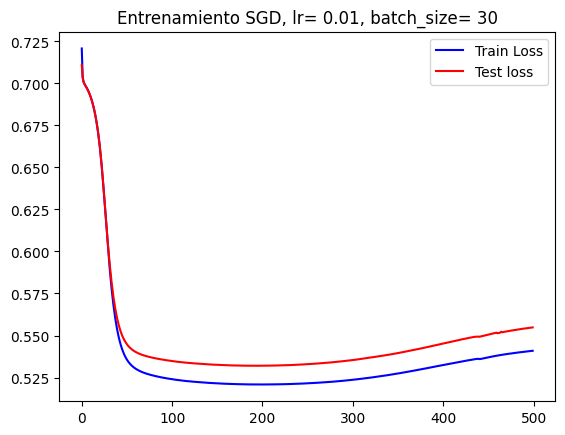

In [44]:
plt.figure()
plt.plot(history['train_loss'], color='b', label='Train Loss')
plt.plot(history['test_loss'], color='r', label='Test loss')
plt.title('Entrenamiento SGD, lr= '+str(lre)+', batch_size= '+str(batch_size))
plt.legend()
plt.show()

Ahora implementaremos el algoritmo adam para resolver este problema:

In [45]:
#This class describes a fully connected layer (without activation function)
beta11=0.77
beta22=0.999

class Linear:
    # W: weight matrix (in x out)
    # b: bias (out x 1)

    #Constructor - we define the parameters of this layer
    def __init__(self, num_inputs, num_outputs, learning_rate, name, beta1=beta11, beta2=beta22, epsilon=1e-8):
      #The parameters are initialized randomly - uniform distribution [0,1)
      # Inicialización de Xavier / Glorot para los pesos
      self.W = np.random.rand(num_inputs, num_outputs) * np.sqrt(2.0 / (num_inputs + num_outputs))
      self.b = np.zeros((num_outputs, 1))
      self.lr = learning_rate
      self.name = name

      # Variables de Adam
      self.beta1 = beta1
      self.beta2 = beta2
      self.epsilon = epsilon
      if beta1 is not None and beta2 is not None and epsilon is not None:
        self.m = np.zeros_like(self.W)
        self.v = np.zeros_like(self.W)
        self.t = 0
      else:
        self.m = None
        self.v = None

    # input: mini-batch (batch_size x in)
    # This function only operates the linear function
    def forward(self, input):
      self.inputs = input
      return np.dot(self.inputs, self.W) + self.b.T

    # dy: Error in next layer (batch_size x out)
    # This functions receives the error of the next layer and computes the error in this layer
    def backward(self, dy):
      batch_size = dy.shape[0]
      dy = dy.T # (out x batch_size)
      dw = dy.dot(self.inputs) #(out x in)
      db = np.sum(dy, axis=1, keepdims=True) #(out x 1)
      dx = np.dot(dy.T, self.W.T) # (batch_size x out) x (out x in)

    # Actualización de pesos con el método Adam
      if self.m is not None and self.v is not None:
            self.t += 1
            self.m = self.beta1 * self.m + (1 - self.beta1) * dw.T
            self.v = self.beta2 * self.v + (1 - self.beta2) * (dw.T ** 2)
            m_hat = self.m / (1 - self.beta1 ** self.t)
            v_hat = self.v / (1 - self.beta2 ** self.t)

            self.W -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            self.b -= self.lr * db
      else:
            # Actualización de pesos sin Adam (descenso de gradiente estándar)
            self.W -= (self.lr/batch_size) * dw.T
            self.b -= (self.lr/batch_size) * db

      #The function computes the error in this layer and returns it for backpropagation
      return dx

#Class for the sigmoid activation function
class Sigmoid:
    def __init__(self):
      pass

    #Computes the sigmoid function
    def forward(self, inputs):
      self.output = 1/(1 + np.exp(-inputs))
      return self.output

    #Backpropagates the incoming error using the derivative of sigmoid
    def backward(self, dy):
      return dy*self.output*(1-self.output) # dy/4

#Class for the ReLU activation function
class ReLU:
  def __init__(self):
    pass

  def forward(self, input):
    self.input = input
    ret = input.copy()
    ret[ret<0] = 0
    return ret

  def backward(self, dy):
    dx = dy.copy()
    dx[self.input<0] = 0
    return dx

In [46]:
lre=0.01 #Learning rate

#Class for the neural network
class NetworkReLU_ADAM:
    def __init__(self):
      lr = lre #Learning rate


      #The layers are in a list
      # Tenemos una red neuronal de 4 etapas
      self.layers = []
      self.layers.append(Linear(num_inputs=4, num_outputs=7, learning_rate=lr, name='fc1', beta1=beta11, beta2=beta22, epsilon=1e-8))
      self.layers.append(Linear(num_inputs=7, num_outputs=3, learning_rate=lr, name='fc2', beta1=beta11, beta2=beta22, epsilon=1e-8))
      self.layers.append(Linear(num_inputs=3, num_outputs=2, learning_rate=lr, name='fc3', beta1=beta11, beta2=beta22, epsilon=1e-8))
      self.layers.append(Linear(num_inputs=2, num_outputs=1, learning_rate=lr, name='fc3'))
      self.layers.append(Sigmoid())
      self.num_layers = len(self.layers)

    #Implements the training algorithm with mini-batch ADAM
    def train(self, training_data, training_label, batch_size, epoch, test_data, test_label, lambd=0.0019,verbose=False):
      def binary_cross_entropy_with_l2(output, labels, lambd):
        epsilon = 1e-15
        output = np.clip(output, epsilon, 1 - epsilon)
        loss = - (labels * np.log(output) + (1 - labels) * np.log(1 - output))

       # Agrega el término de regularización L2
        l2_reg = 0.0
        for layer in self.layers:
          if isinstance(layer, Linear):
            l2_reg += np.sum(layer.W ** 2)
            loss += 0.5 * lambd * l2_reg
        return loss

      #History values of losses
      train_loss = []
      test_loss = []

      #Main outer loop
      for e in range(epoch):
        # Perform a training epoch
        loss = 0

        #Iterate over each batch
        for batch_index in range(0, training_data.shape[0], batch_size):
          #We need to identify whether a batch is complete or a batch is incomplete because it is the last one
          if batch_index+batch_size < training_data.shape[0]:
            data = training_data[batch_index:batch_index+batch_size]
            label = training_label[batch_index:batch_index+batch_size]
          else:
            data = training_data[batch_index:training_data.shape[0]]
            label = training_label[batch_index:training_label.shape[0]]

          acc = 0

          #Forward pass - iterate over the list of layers
          x = data
          for l in range(self.num_layers):
            output = self.layers[l].forward(x)
            x = output

          #The first error is the derivative of the loss wrt. the NN output
          dy = output - label
          #loss += mse(output, label) #Compute the loss
          loss += np.sum(binary_cross_entropy_with_l2(output, label,lambd)) #Compute the loss

          #Backpropagate
          for l in range(self.num_layers-1, -1, -1):
            dout = self.layers[l].backward(dy)
            dy = dout

            for layer in self.layers:
              if isinstance(layer, Linear):
                loss += 0.5 * lambd * np.sum(layer.W ** 2)  # Término de regularización L2 en la pérdida
                # Resto del código de entrenamiento de la capa lineal

        #End of an epoch
        loss /= training_data.shape[0]
        train_loss.append(loss)

        #Test after one epoch
        loss = 0
        outputs = []

        correct = 0
        for batch_index in range(0, test_data.shape[0], batch_size):
          if batch_index+batch_size < test_data.shape[0]:
            data = test_data[batch_index:batch_index+batch_size]
            label = test_label[batch_index:batch_index+batch_size]
          else:
            data = test_data[batch_index:test_data.shape[0]]
            label = test_label[batch_index:test_label.shape[0]]

          acc = 0

          #Forward pass
          x = data
          for l in range(self.num_layers):
            output = self.layers[l].forward(x)
            x = output

          #loss += mse(output, label)
          loss += np.sum(binary_cross_entropy_with_l2(output, label,lambd)) #Compute the loss

          test_output = (output >= 0.5)
          #Compare the output of the network with the correct labels
          correct += (test_output == label).sum()

        loss /= test_data.shape[0]
        test_loss.append(loss)

        if verbose:
          print('Epoch {}/{}: loss = {}: Test accuracy={}'.format(e, epoch, loss, (100*correct)/test_label.shape[0]))
        else:
          if e % 20 == 0:
            print('Epoch {}/{}: loss = {}: Test accuracy={}'.format(e, epoch, loss, (100*correct)/test_label.shape[0]))

      return dict({'train_loss': train_loss, 'test_loss':test_loss})

    def evaluate(self, data, label, batch_size):
      correct = 0
      for batch_index in range(0, data.shape[0], batch_size):
        if batch_index+batch_size < data.shape[0]:
          ndata = data[batch_index:batch_index+batch_size]
          nlabel = label[batch_index:batch_index+batch_size]
        else:
          ndata = data[batch_index:data.shape[0]]
          nlabel = label[batch_index:label.shape[0]]

        x = ndata
        for l in range(self.num_layers):
          output = self.layers[l].forward(x)
          x = output

        test_output = (output >= 0.5)
        #Compare the output of the network with the correct labels
        correct += (test_output == nlabel).sum()

      return (100*correct)/label.shape[0]

    def predict(self, data, batch_size):
      output_pred = []

      for batch_index in range(0, data.shape[0], batch_size):
        if batch_index+batch_size < data.shape[0]:
          ndata = data[batch_index:batch_index+batch_size]
        else:
          ndata = data[batch_index:data.shape[0]]

        x = ndata
        for l in range(self.num_layers):
          output = self.layers[l].forward(x)
          x = output

        test_output = (output >= 0.5)
        #test_output = np.argmax(output, axis=1)
        output_pred.append(test_output)

      return np.vstack(output_pred)

In [47]:
batch_size=30
net2 = NetworkReLU_ADAM()
history = net2.train(X_train, Y_train, batch_size, 600, X_test, Y_test)

print('Train accuracy:{} - Test accuracy: {}'.format(net2.evaluate(X_train, Y_train, batch_size), net2.evaluate(X_test, Y_test, batch_size)))

Epoch 0/600: loss = 0.5801210801373963: Test accuracy=75.28542646071189
Epoch 20/600: loss = 0.5861106088547233: Test accuracy=77.46809939556749
Epoch 40/600: loss = 0.6533000686756343: Test accuracy=78.00537273337811
Epoch 60/600: loss = 0.7099455342062441: Test accuracy=78.17327065144393
Epoch 80/600: loss = 0.7665588797444403: Test accuracy=78.03895231699127
Epoch 100/600: loss = 0.831821256624006: Test accuracy=78.13969106783075
Epoch 120/600: loss = 0.8870154130678892: Test accuracy=78.07253190060443
Epoch 140/600: loss = 0.9338430775882501: Test accuracy=78.03895231699127
Epoch 160/600: loss = 0.9792739435026866: Test accuracy=77.97179314976495
Epoch 180/600: loss = 1.0261389161798227: Test accuracy=77.93821356615177
Epoch 200/600: loss = 1.07333525120947: Test accuracy=77.87105439892545
Epoch 220/600: loss = 1.1210821658459127: Test accuracy=77.93821356615177
Epoch 240/600: loss = 1.1686846382024512: Test accuracy=77.93821356615177
Epoch 260/600: loss = 1.2163760311178768: Test 

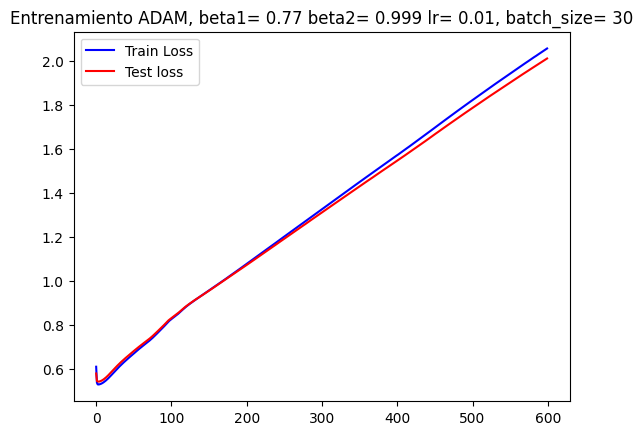

In [48]:
plt.figure()
plt.plot(history['train_loss'], color='b', label='Train Loss')
plt.plot(history['test_loss'], color='r', label='Test loss')
plt.title('Entrenamiento ADAM, beta1= '+ str(beta11)+' beta2= '+str(beta22)+' lr= '+str(lre)+', batch_size= '+str(batch_size))
plt.legend()
plt.show()

# REFERENCIAS GENERALES



[1] Material de Inspiración para abordar el trabajo:

Tarea 1, Análisis de Datos e Inferencia Causal, año 2022. Material disponible en: [este enlace](https://www.u-cursos.cl/ingenieria/2023/2/MA4402/1/grupos/1/15/material_docente/o/7409325).

\\

[2] Extracción de la base de datos:

Centro de estudios Mineduc, Ministerio de Educación. Datos abiertos: Prueba de Admisión a la Educación Superior (PAES), año 2023, archivo nombre: ***Prueba de Acceso a la Educación Superior 2023 - Inscritos Puntajes***. Material accesible desde [aquí](https://datosabiertos.mineduc.cl/pruebas-de-admision-a-la-educacion-superior/)